This notebook explores an alternative approach to finding the optimal <code>k</code> in k-means clustering.

The idea is to minimise the area/volume covered by the disks/n-dimensional balls that contain the clusters.

It seems to work quite well.

In [1]:
# import the custom implementation of k-means ...
from clustering_easy_k_optimisation import *
# ... and some basic libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# number of samples
m=1000

## Generate data

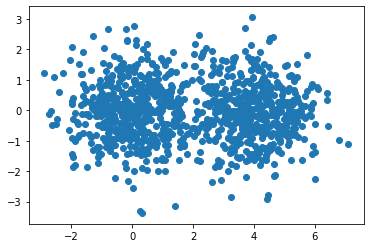

In [2]:
# generate a dataset with two overlapping clusters
offset = np.zeros((m,2))
x_shift = np.random.choice([0,4], (m,))
offset[:,0] = x_shift
data = sample_from_unit_ball(m,2, mode='normal') + offset
plt.scatter(data[:,0], data[:,1])

## Clustering

In [3]:
# use the coustom-build implementation to carry out k means for different k
class_dict, centroids_dict, vol_dict, sse_dict = clustering_multiple_k(data)

k=1: Stopped clustering after iteration 0
k=2: Stopped clustering after iteration 4
k=3: Stopped clustering after iteration 17
k=4: Stopped clustering after iteration 13
k=5: Stopped clustering after iteration 18
k=6: Stopped clustering after iteration 13
k=7: Stopped clustering after iteration 22
k=8: Stopped clustering after iteration 19
k=9: Stopped clustering after iteration 23


In [4]:
vol_dict

{'k=1': 85.99838162974625,
 'k=2': 71.3213374217997,
 'k=3': 104.45776942366405,
 'k=4': 113.07989613432171,
 'k=5': 105.38585142295119,
 'k=6': 105.83815237072837,
 'k=7': 111.29027905556138,
 'k=8': 116.90705501346804,
 'k=9': 109.5548783307574}

Looking at the volumes suggests that <code>k=2</code> (smallest volume) is the best number of clusters (see below for more explanation of this metric).

From the sum of squared errors (sse; sum of squared distance or all points to their centroids), one can't immediately read off the best value, but the elbow method tells us to look for the kink in the graph (this will be done later, for an example with higher value of <code>k</code>.)

In [5]:
sse_dict

{'k=1': 5941.529519189864,
 'k=2': 1915.7499269792966,
 'k=3': 1529.3260406303393,
 'k=4': 1248.9999502063517,
 'k=5': 1037.2854598368474,
 'k=6': 820.2797342757232,
 'k=7': 733.5790431396299,
 'k=8': 658.5670333810596,
 'k=9': 598.3772062944545}

## Visualise results

Text(0.5, 1.0, 'k=1')

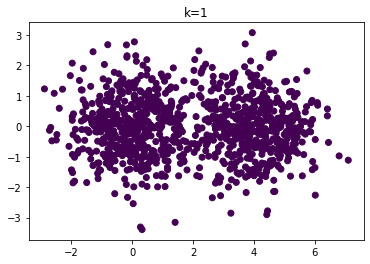

In [6]:
key='k=1'
plt.scatter(data[:,0], data[:,1], c=class_dict[key])
plt.title(key)

Text(0.5, 1.0, 'k=2')

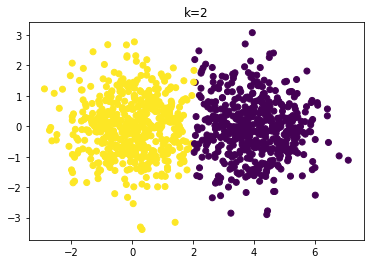

In [7]:
key='k=2'
plt.scatter(data[:,0], data[:,1], c=class_dict[key])
plt.title(key)

Text(0.5, 1.0, 'k=3')

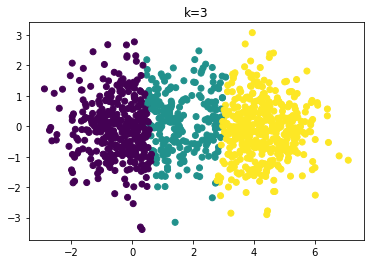

In [8]:
key='k=3'
plt.scatter(data[:,0], data[:,1], c=class_dict[key])
plt.title(key)

Text(0.5, 1.0, 'k=4')

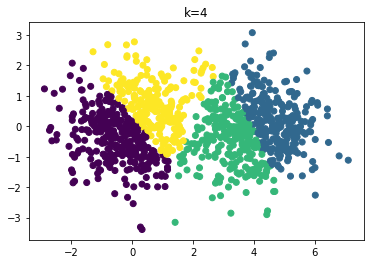

In [9]:
key='k=4'
plt.scatter(data[:,0], data[:,1], c=class_dict[key])
plt.title(key)

Text(0.5, 1.0, 'k=6')

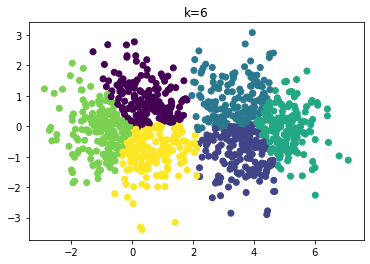

In [10]:
key='k=6'
plt.scatter(data[:,0], data[:,1], c=class_dict[key])
plt.title(key)

## Explanation of 'volume'

The metric 'volume' that was used here is simply the sum of the volumes of the disks (in general: n-dimensional balls) centred at the class centres (centroids) that contain all members of that class. E.g., in the above plots: Two disks containing each of the clusters are the most efficient way to cover all points. One large disk (k=1) would contain too much whitespace and many smaller disks (k>2) have too much overlap.

It seems that the 'volume' used above can help to find the best value for <code>k</code>. However, that probably doesn't always work well. Cf. below for more experiments.

## Another low-dimensional experiment

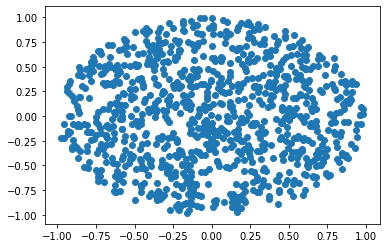

In [11]:
# the written package also contains a function that generates samples
# in a disk/ball (the purpose: to simulate well-defined clusters)
# the following is just to test that sampling is uniform across the disk
data = sample_from_unit_ball(m, 2, mode='uniform')
plt.scatter(data[:,0], data[:,1])

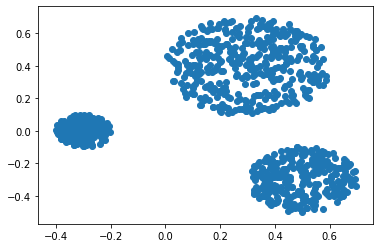

In [12]:
# generate data with three well-defined clusters
data1 = np.array([[-0.3,0]]) + 0.1 * sample_from_unit_ball(int(m*0.2), 2, mode='uniform')
data2 = np.array([[0.5,-0.3]]) + 0.2 * sample_from_unit_ball(int(m*0.3), 2, mode='uniform')
data3 = np.array([[0.3,0.4]]) + 0.3 * sample_from_unit_ball(int(m*0.4), 2, mode='uniform')
data = np.concatenate((data1, data2, data3), axis=0)
plt.scatter(data[:,0],data[:,1])

In [13]:
class_dict, _, vol_dict, sse_dict = clustering_multiple_k(data)

k=1: Stopped clustering after iteration 0
k=2: Stopped clustering after iteration 9
k=3: Stopped clustering after iteration 2
k=4: Stopped clustering after iteration 8
k=5: Stopped clustering after iteration 21
k=6: Stopped clustering after iteration 16
k=7: Stopped clustering after iteration 13
k=8: Stopped clustering after iteration 23
k=9: Stopped clustering after iteration 21


In [14]:
vol_dict

{'k=1': 1.3822867069134157,
 'k=2': 1.2413898633198026,
 'k=3': 0.46059672198882085,
 'k=4': 0.6041043109786389,
 'k=5': 0.8556529675165808,
 'k=6': 0.8644793688450041,
 'k=7': 0.8274339969341318,
 'k=8': 0.675199253619649,
 'k=9': 0.7144489985500765}

Text(0.5, 1.0, 'Look for the elbow! (Coincides with the minimal volume in the cell above.)')

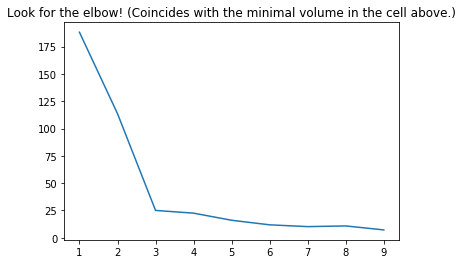

In [15]:
plt.plot(list(range(1,10)), list(sse_dict.values()))
plt.title('Look for the elbow! (Coincides with the minimal volume in the cell above.)')

Text(0.5, 1.0, 'k=3')

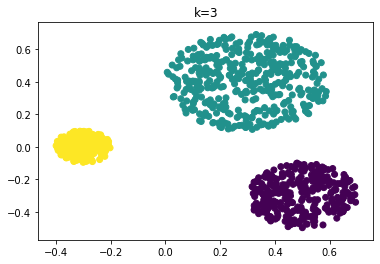

In [16]:
key='k=3'
plt.scatter(data[:,0], data[:,1], c=class_dict[key])
plt.title(key)

## High-dimensional example

Text(0.5, 1.0, 'A projection of the high-dimensional data')

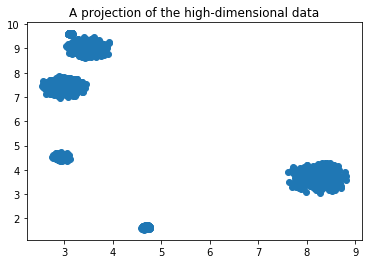

In [17]:
# Let's try a randomly generated data set in higher dimensions.
num = 1000
dim = 10
size = 10  # size of the cube 
num_blobs = 6

def generate_blob():
    return size * np.random.rand(1,dim) + np.random.rand() * sample_from_unit_ball(int(num*np.random.rand())+1,
                                                                                   dim, mode='uniform')

data = generate_blob()
for i in range(num_blobs-1):
    data = np.concatenate((data, generate_blob()), axis=0)

plt.scatter(data[:,0],data[:,1])
plt.title('A projection of the high-dimensional data')

In [18]:
class_dict, _, vol_dict, dist_sum_dict = clustering_multiple_k(data)

k=1: Stopped clustering after iteration 0
k=2: Stopped clustering after iteration 1
k=3: Stopped clustering after iteration 1
k=4: Stopped clustering after iteration 1
k=5: Stopped clustering after iteration 19
k=6: Stopped clustering after iteration 3
k=7: Stopped clustering after iteration 15
k=8: Stopped clustering after iteration 24
k=9: Stopped clustering after iteration 25


Text(0.5, 1.0, 'k=6')

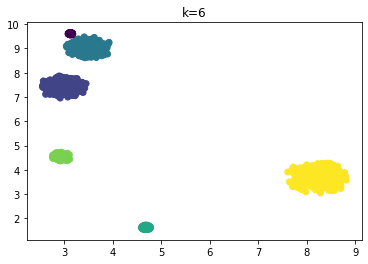

In [19]:
key='k=' + str(num_blobs)
plt.scatter(data[:,0], data[:,1] ,c=class_dict[key])
plt.title(key)

In [20]:
vol_dict

{'k=1': 12393022413.942577,
 'k=2': 25513711507.04877,
 'k=3': 11245927932.355192,
 'k=4': 10659028556.20432,
 'k=5': 1864887830.9500217,
 'k=6': 0.4138472680619436,
 'k=7': 0.41385559971340286,
 'k=8': 1671501380.0709093,
 'k=9': 500285432.589964}

# Comparsion to scikit-learn

CPU times: user 404 ms, sys: 48 ms, total: 452 ms
Wall time: 299 ms


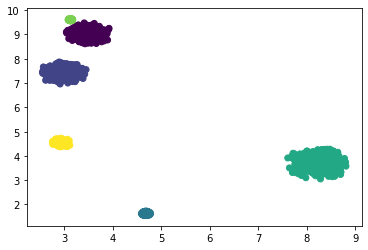

In [21]:
%%time
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=num_blobs).fit(data)
plt.scatter(data[:,0], data[:,1], c=kmeans.labels_)

k=6: Stopped clustering after iteration 3
CPU times: user 1.1 s, sys: 140 ms, total: 1.24 s
Wall time: 401 ms


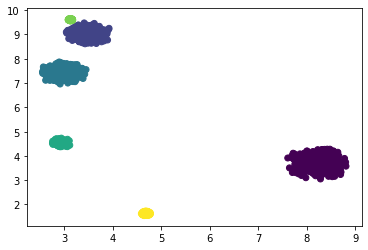

In [22]:
%%time
classes, _, _, _ = clustering_fixed_k(data, num_blobs)
plt.scatter(data[:,0], data[:,1], c=classes)

# Final remark / to-do

Disclaimer: The clustering doesn't always work (in fact, quite often, it doesn't). That's an issue in my implementation of k-means though -- the message regarding the 'volume' metric still seems to be valid when the clustering works.

To fix the clustering: look into handling orphaned centroids differently, look into ways that avoid getting stuck in local optima, etc